Neural Network
เป็นสาขาหนึ่งของปัญญาประดิษฐ์ Artificial Intelligence (AI) เป็นแนวคิดที่ออกแบบระบบโครงข่ายคอมพิวเตอร์
ให้เลียนแบบการทำงานของสมองมนุษย์ มนุษย์มีกระบวนการเรียนรู้โดยจดจำรูปแบบ คือ มนุษย์สังเกตุเห็นสิ่งของที่ไม่รู้จักเมื่อเกิดการเห็นบ่อยๆมากขึ้น เห็นในรูปแบบที่แตกต่างมากขึ้นก็จะเกิดการเรียนรู้และจดจำในสิ่งที่คล้ายๆกัน และเมื่อเห็นสิ่งนั้นอีกครั้งก็จะสามารถบอกได้ว่าสิ่งที่เห็นนี้คืออะไร
โดยจำลองการทำงานมาจากสมองมนุษย์ โดยสมองของมนุษย์มีส่วนที่เป็นหน่วยประมวลผลและเชื่อมโยงกันด้วยระบบประสาทช่วยให้สามารถวิเคราะห์หรือตัดสินใจได้อย่างรวดเร็วและทันที



รูปแบบของ Neural Network จะแบ่ง Perceptron ออกเป็นชั้น โดยแต่ละชั้นจะเรียกเป็น Layer โดยข้อมูลที่เข้ามาจะไหลไปในทิศทางเดียว ไม่ไหลย้อนกลับจาก Layer นึงสู่อีก Layer นึง

โครงสร้างของNeural Network แบบเพอร์เซ็ปตรอนหลายชั้น(Multi-Layer Perceptron : MLP)จะประสานการทำงานผ่านส่วนที่เรียกว่าโหนด (Node) ประกอบไปด้วย 3 ชั้นมีการเชื่อมต่อการทำงานของโหนดอย่างสมบูรณ์ (Fully-Connected) ได้แก่

    Input Layer ชั้นนี้จะเป็นส่วนที่จัดการข้อมูล input จำนวนของโหนดขึ้นอยู่กับจำนวนของ input ว่าข้อมูลอะไรบ้างที่จะนำเข้ามาคิดในโมเดล (ใน ML เรียกส่วนนี้ว่า Feature)

    Hidden Layer ชั้นที่อยู่ตรงกลางมีผลต่อประสิทธิภาพในการเรียนรู้ของโมเดล ซึ่งชั้นนี้จะมีกี่ชั้นก็ได้ มีจำนวนของ Neuron เท่าไหร่ก็ได้ การเพิ่มชั้นและจำนวน neuron ก็จะส่งผลต่อการทำงานของโมเดลมากๆ มีการเรียนรู้ข้อมูลในเชิงลึกเรียกว่า Deep Learning

    Output Layer ชั้นนี้จะนำเอาข้อมูลจากการคำนวณใน Hidden Layer ไปใช้งานจำนวนของโหนดที่ส่งออกมาในชั้นนี้ขึ้นอยู่กับรูปแบบของ output ที่จะเอาไปใช้

In [41]:
import os # กำหนด Path
os.chdir("/Users/phutharesuanwachirapisut/Downloads/Programming/Dataset")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.io import loadmat
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
# Machine Learning  แบบไม่มีผู้สอน หรือก็คือไม่มีเฉลย หรือเรียกว่า class

In [42]:
mnist_raw = loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}
x, y = mnist["data"], mnist['target']

# สลับตำแหน่งข้อมูลใหม่
shuffle_data = np.random.permutation(70000)
x, y = x[shuffle_data], y[shuffle_data]

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


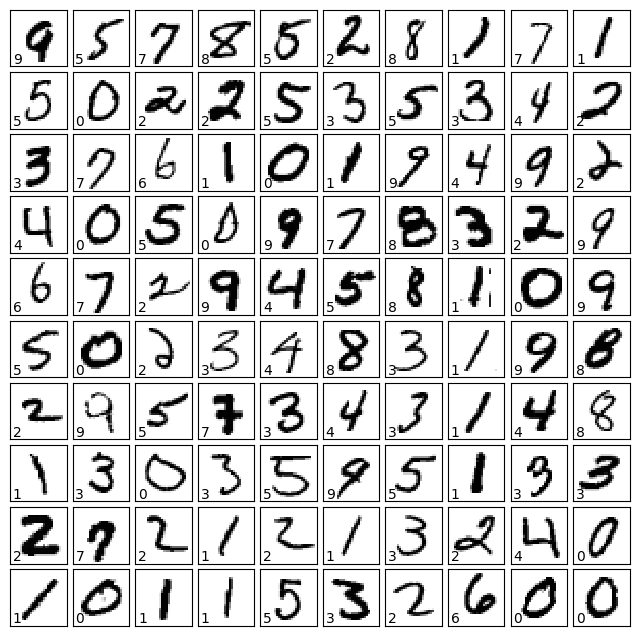

In [43]:
# เตรียมข้อมูลเพื่อนำไป train ใน model
fig,ax = plt.subplots(10,10, 
            figsize=(8,8), 
            subplot_kw={'xticks':[], "yticks":[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1)
            )

for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i].reshape(28,28), cmap="binary", interpolation="nearest")
    axi.text(0.05, 0.05, str(int(y_train[i])), transform=axi.transAxes, color="k")
plt.show()

# ข้อมูลรูปภาพอยู่ที่ x_train
# ข้อมูลผลเฉลยอยู่ที่ y_train
# จากภาพ เราจะได้ว่า model นี้ถูก train เรียบร้อยแล้ว

In [44]:
# Create Model
model = MLPClassifier()
model.fit(x_train, y_train)

MLPClassifier()

In [45]:
# Predict
y_pred = model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)*100}")

Accuracy Score: 96.75


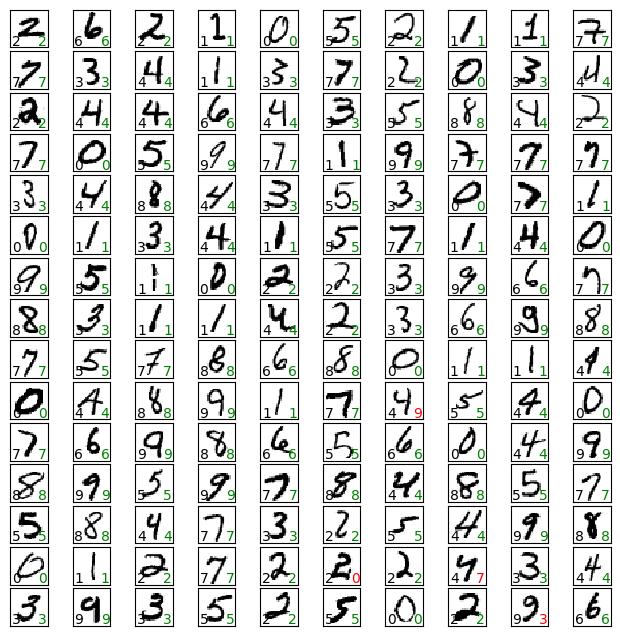

In [53]:
fig,ax = plt.subplots(15,10, 
            figsize=(8,8), 
            subplot_kw={'xticks':[], "yticks":[]},
            gridspec_kw=dict(hspace=0.1, wspace=0.1)
            )

# Display image data after training and prediction

for i, axi in enumerate(ax.flat):
    # Display test image data
    axi.imshow(x_test[i].reshape(28,28), cmap="binary", interpolation="nearest")
    # Display text True number image data
    axi.text(0.05, 0.05, str(int(y_test[i])), transform=axi.transAxes, color="k")
    # Display text Predicty number image data
    axi.text(0.75, 0.05, str(int(y_pred[i])), transform=axi.transAxes, color="g" if y_pred[i]==y_test[i] else "r")
plt.show()

